# Data Exploration

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import acquire
import prepare

## Explore Sales/Items Dataframe

In [2]:
items = acquire.get_df('items')
sales = acquire.get_df('sales')
stores = acquire.get_df('stores')

In [3]:
df = acquire.combine_df(items, sales, stores)

In [4]:
df = prepare.prep_items(df)

In [5]:
df.head(3).T

sale_date,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00,2013-01-01 00:00:00+00:00
item_brand,Riceland,Mueller,Mama Marys
item,1,12,46
item_name,Riceland American Jazmine Rice,Mueller Sport Care Basic Support Level Medium ...,Pizza Sauce
item_price,0.84,8.4,4.65
item_upc12,35200264013,74676640211,35457770664
item_upc14,35200264013,74676640211,35457770664
sale_amount,13,26,27
sale_id,1,211817,832657
store,1,7,7
store_address,12125 Alamo Ranch Pkwy,12018 Perrin Beitel Rd,12018 Perrin Beitel Rd


In [6]:
df.dtypes

item_brand        object
item               int64
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
sale_amount      float64
sale_id            int64
store              int64
store_address     object
store_city        object
store_state       object
store_zipcode      int64
month              int64
weekday           object
sales_total      float64
dtype: object

In [7]:
# split dataframe
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

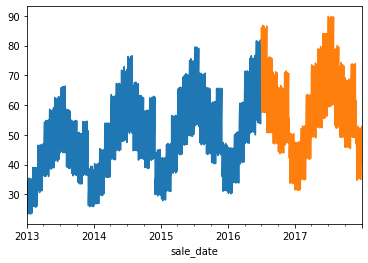

In [13]:
train.resample('D').sale_amount.mean().plot()
test.resample('D').sale_amount.mean().plot();

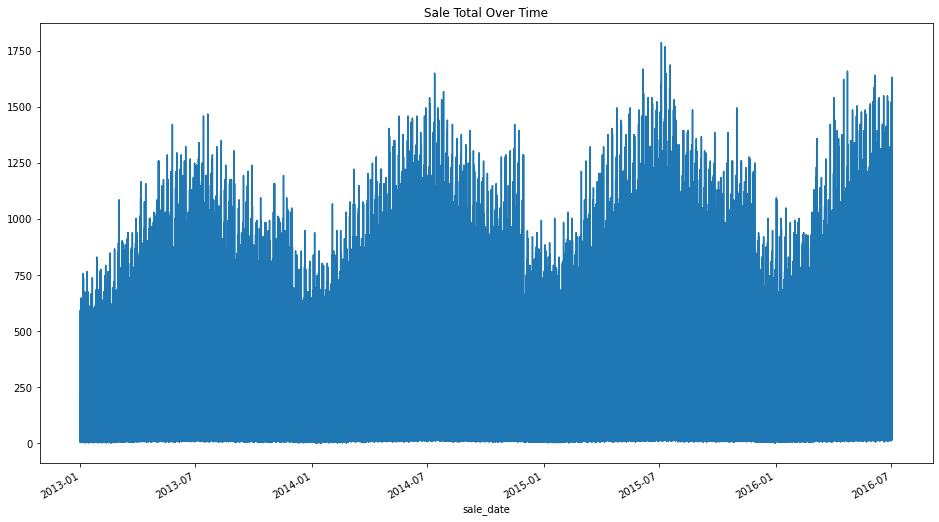

In [8]:
# plot sale_amount
plt.figure(figsize=(16,9))
train['sales_total'].plot()
plt.title('Sale Total Over Time');

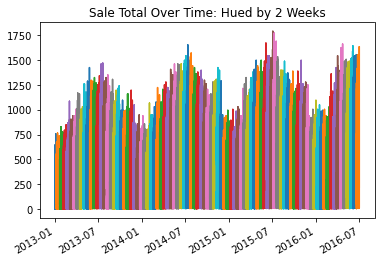

In [9]:
# grouping by 2 weeks not using mean just to see what the visual is like
train['sales_total'].resample('2W').plot()
plt.title('Sale Total Over Time: Hued by 2 Weeks');

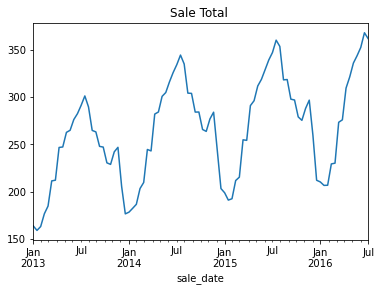

In [10]:
# grouping by 2 weeks
train['sales_total'].resample('2W').mean().plot()
plt.title('Sale Total ');

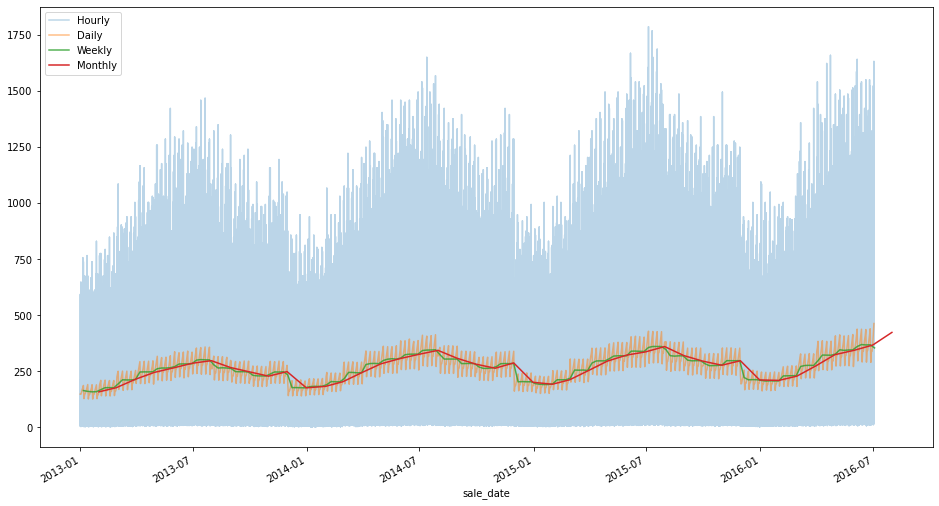

In [11]:
# visual of sales amount over varying times
plt.figure(figsize=(16,9))
ax = train['sales_total'].plot(alpha=.3, label='Hourly')
train['sales_total'].resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
train['sales_total'].resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
train['sales_total'].resample('M').mean().plot(ax=ax, label='Monthly')

ax.legend();

In [18]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('ggplot')

# assign our y value for easy plotting
y = train.resample('D').sale_amount.mean()

y.describe()

count    1279.000000
mean       49.436718
std        11.879114
min        23.418000
25%        40.251000
50%        48.876000
75%        58.352000
max        81.930000
Name: sale_amount, dtype: float64

Text(0, 0.5, 'Difference in sales from day to day')

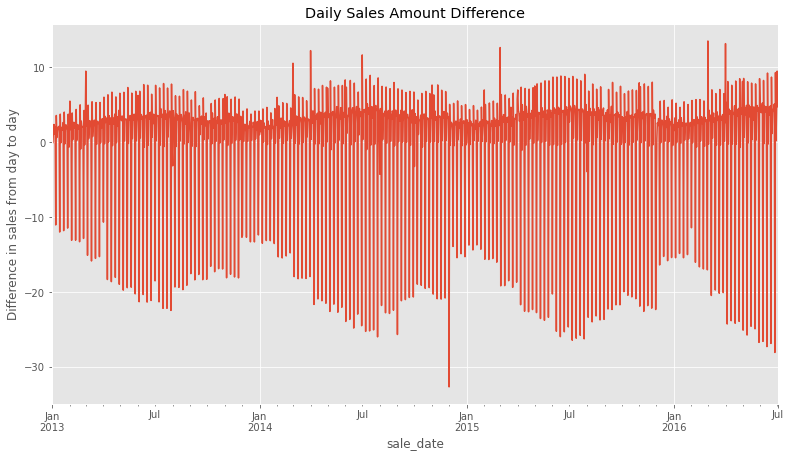

In [19]:
y.diff().plot()
plt.title('Daily Sales Amount Difference')
plt.ylabel('Difference in sales from day to day')

In [20]:
y.pct_change()

sale_date
2013-01-01 00:00:00+00:00         NaN
2013-01-02 00:00:00+00:00   -0.001314
2013-01-03 00:00:00+00:00    0.059219
2013-01-04 00:00:00+00:00    0.082068
2013-01-05 00:00:00+00:00    0.035721
                               ...   
2016-06-28 00:00:00+00:00    0.173151
2016-06-29 00:00:00+00:00    0.003139
2016-06-30 00:00:00+00:00    0.069347
2016-07-01 00:00:00+00:00    0.140429
2016-07-02 00:00:00+00:00    0.061737
Freq: D, Name: sale_amount, Length: 1279, dtype: float64

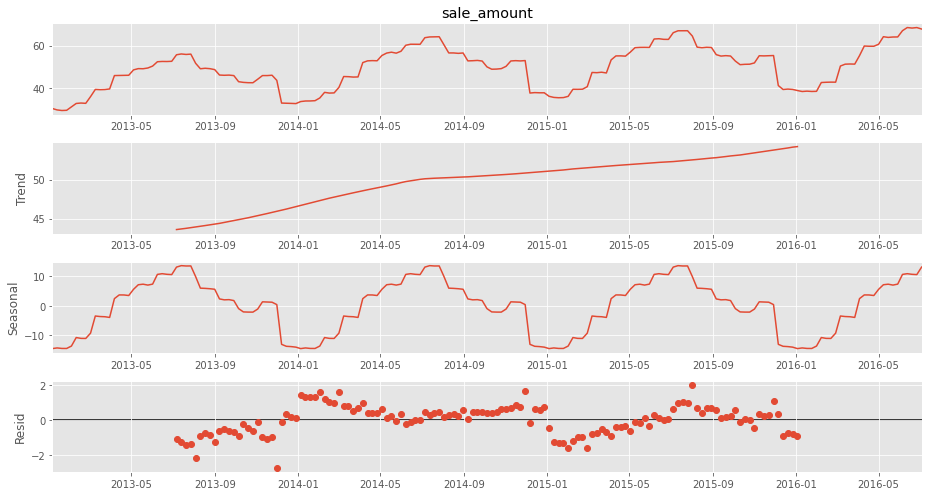

In [22]:
# take a look at seasonal graphing
sm.tsa.seasonal_decompose(y.resample('W').mean()).plot()
None

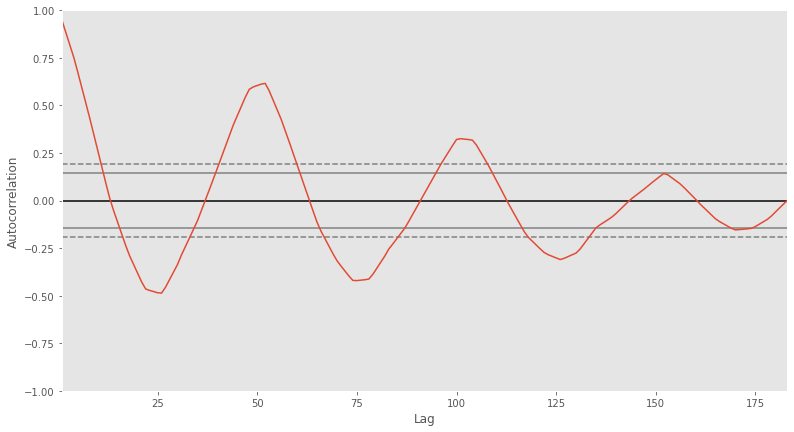

In [24]:
pd.plotting.autocorrelation_plot(y.resample('W').mean());

### Germany Data

In [29]:
df = acquire.get_germany()
df.Date = pd.to_datetime(df.Date)

In [30]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [31]:
df.fillna(0)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,0.000,0.000,0.000
1,2006-01-02,1380.52100,0.000,0.000,0.000
2,2006-01-03,1442.53300,0.000,0.000,0.000
3,2006-01-04,1457.21700,0.000,0.000,0.000
4,2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [32]:
# using pct cut off method
train_pct = .8
n = df.shape[0]
test_start_index = round(n * train_pct)

train = df[:test_start_index]
test = df[test_start_index:]

train = train.set_index('Date').resample('D').mean()
test = test.set_index('Date').resample('D').mean()

<AxesSubplot:xlabel='Date'>

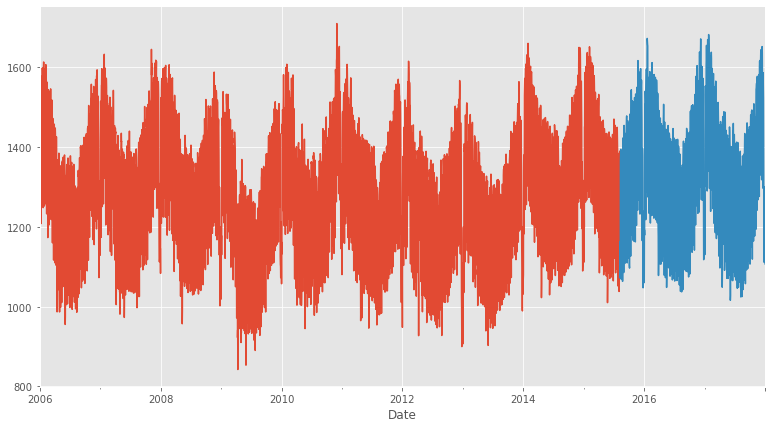

In [33]:
# verify split
train.Consumption.plot()
test.Consumption.plot()

In [ ]:
y = train.Consumption

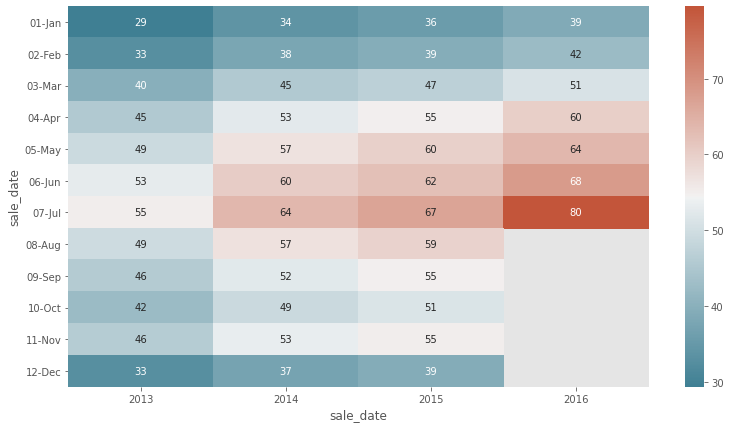

In [38]:
table = y.groupby([y.index.strftime('%Y'), y.index.strftime('%m-%b')]).mean().unstack(0)
sns.heatmap(table, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True);

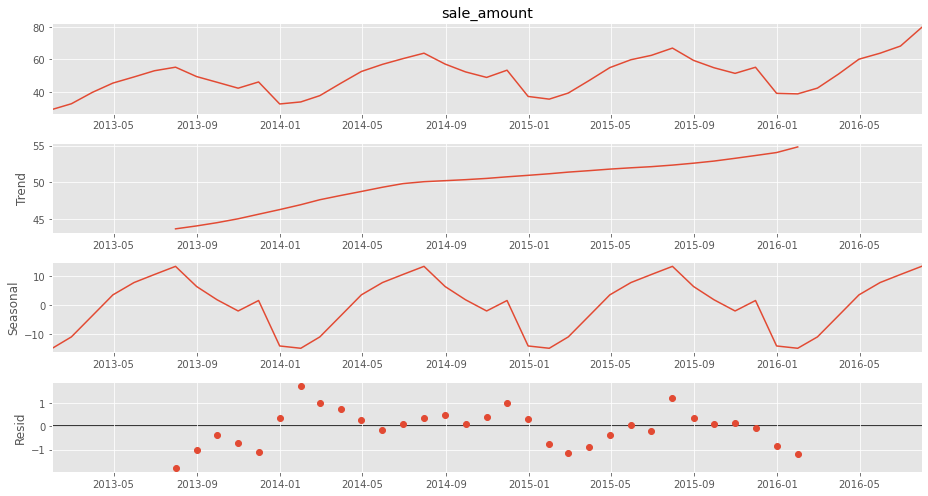

In [40]:
# take a look at seasonal data
sm.tsa.seasonal_decompose(y.resample('M').mean()).plot()
None

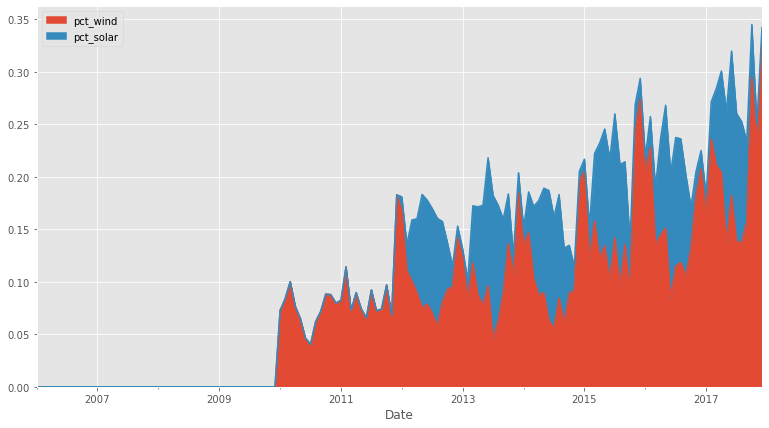

In [46]:
df = acquire.get_germany()

df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date').fillna(0)

df = df.resample('M').sum()

df['pct_wind'] = df.Wind / df.Consumption
df['pct_solar'] = df.Solar / df.Consumption

df[['pct_wind', 'pct_solar']].plot.area();